Exploração, análise e tratamento dos dados: Projeto previsão de doenças cardíacas

Este projeto tem o objetivo desenvolver um algoritimo de Machine Learning para prever a têndencia de uma pessoa desenvolver algum tipo de doença cardíaca com base em alguns fatores clínincos e laboratoriais de  referencia

In [3]:
import numpy as np
import pandas as pd

In [4]:
dados = pd.read_csv('dados\heart.csv',
                     sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8 ou latin-1

Exploração dos Dados

In [5]:
dados.head() #Primeiros 5 registros

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
dados.tail() #Ultimos 5 registros

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
dados.shape #Conta o registro 0 por isso é 918 não 917

(918, 12)

Analise das Variaveis

In [8]:
dados['Age'].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [9]:
dados['Age'].value_counts().sort_index()

28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: Age, dtype: int64

In [10]:
import plotly.express as px

In [23]:
hist1 = px.histogram (dados, x = "Age", nbins=60)
hist1.update_layout(width=600,height=400,title_text="Distribuição das idades")
hist1.show()

In [24]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

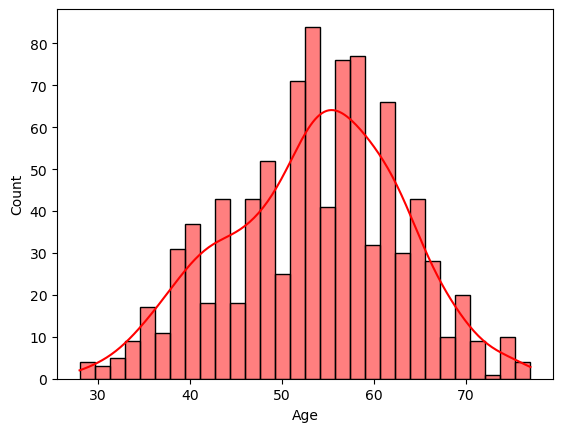

In [40]:
sns.histplot(dados, x='Age', bins=30, color="red", kde=True, stat="count")

In [41]:
dados['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

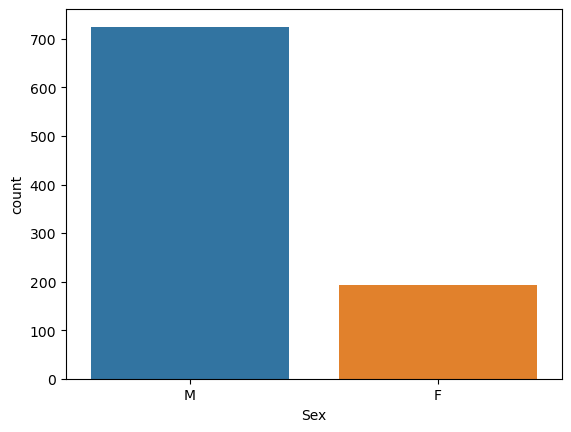

In [45]:
sns.countplot(x= 'Sex', data=dados)

In [46]:
dados.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


Chest Pain Type = tipo de dor no peito

In [47]:
dados['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

ASY: assintomática
NAP: dor não anginosa
ATA: anginosa atípica
TA: anginosa típica
Anginosa: Dor no peito pela diminuição do fluxo de sangue no coração

<Axes: xlabel='ChestPainType', ylabel='count'>

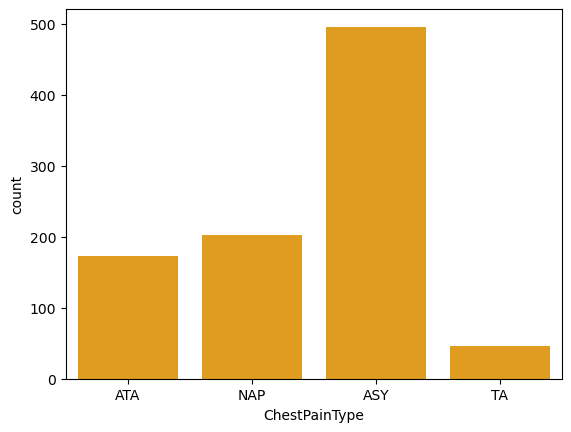

In [54]:
sns.countplot(x="ChestPainType", data=dados, color="orange"); #caso color ; no final não aparece um texto em cima da imagem

RestingBP (blood pressure) = preção sanguínea emrepouso em mmHg(sistólica)

In [59]:
dados['RestingBP'].value_counts().sort_index() #Primeiro dado é a preção e o segundo é a quantidade de pessoas

0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64

<Axes: xlabel='RestingBP', ylabel='Count'>

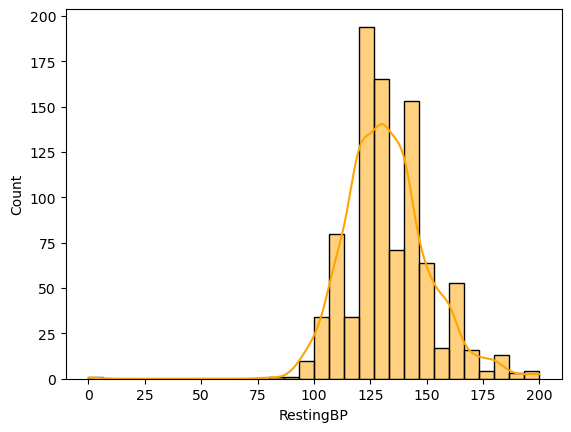

In [60]:
sns.histplot(dados, x='RestingBP', bins=30, color="orange", kde=True, stat="count")

In [61]:
dados['Cholesterol'].value_counts().sort_index()

0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

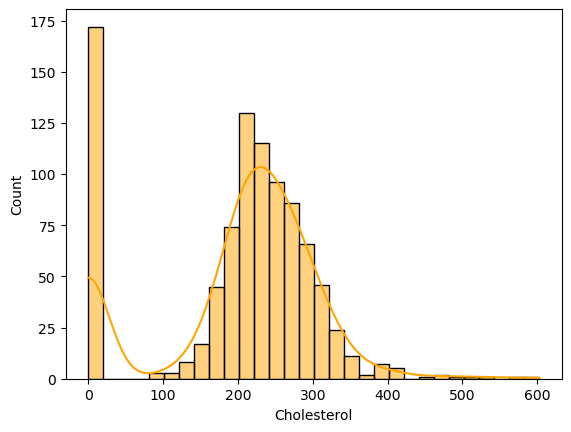

In [66]:
sns.histplot(dados, x='Cholesterol', bins=30, color="orange", kde=True, stat="count");

FastingBS (blood sugar) = açicar no sangue em jejum (mg/dl)

In [68]:
dados['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

0: FastingBS < 120 mg/dl (não diabetico)
1: FastingBS >= 120 mg/dl (diabetico)

<Axes: xlabel='FastingBS', ylabel='count'>

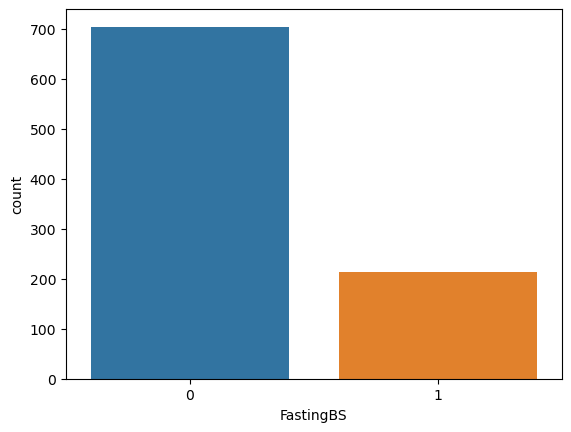

In [69]:
sns.countplot(x='FastingBS', data=dados)

RestingECG = eletrocardiograma em repouso

In [70]:
dados['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

Normal: Normal
LVH: Hiperbole ventricular esquerda
ST: Anormalidade da onda ST-T

Segmento ST: Qualquer desnivel do ST, para cimaou para baixo deve ser avaliado pois pode corresponder a um infarto agudo do miocárdio.

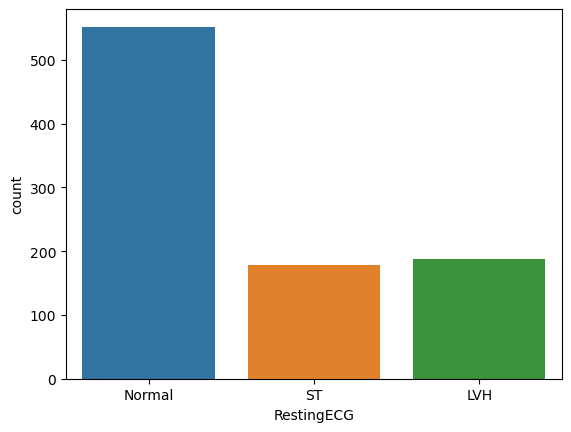

In [73]:
sns.countplot(x='RestingECG', data=dados);